# **I. Setting up**
1. Import library



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2. Input data

In [2]:
data = pd.read_csv('Clean_Dataset.csv')

In [3]:
data.shape

(300153, 12)

In [4]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
data = data.drop('Unnamed: 0', axis= 1)
for column in data.columns:
    print(f"Value counts for column: {column}")
    print(data[column].value_counts(dropna=False))  # Includes NaN values
    print("-" * 50)

Value counts for column: airline
airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: flight
flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
6E-3211       1
6E-6474       1
6E-2914       1
SG-1058       1
6E-2939       1
Name: count, Length: 1561, dtype: int64
--------------------------------------------------
Value counts for column: source_city
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: departure_time
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int

# **II. Data Preparation**



In [6]:
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
print(data.nunique())

airline                 6
flight               1561
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
price               12157
dtype: int64


In [9]:
data = data.drop('flight', axis = 1)

Column 'Flight' stores information regarding the plane's flight code so it has too many unique values, and it seem does not necessary due to it does not stand for any features

In [10]:
data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [11]:
df = data.copy()

# **III. Data Exploration**

### **1. Airline & Price**

In [12]:
flight_airline = df['airline'].value_counts()
flight_airline

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

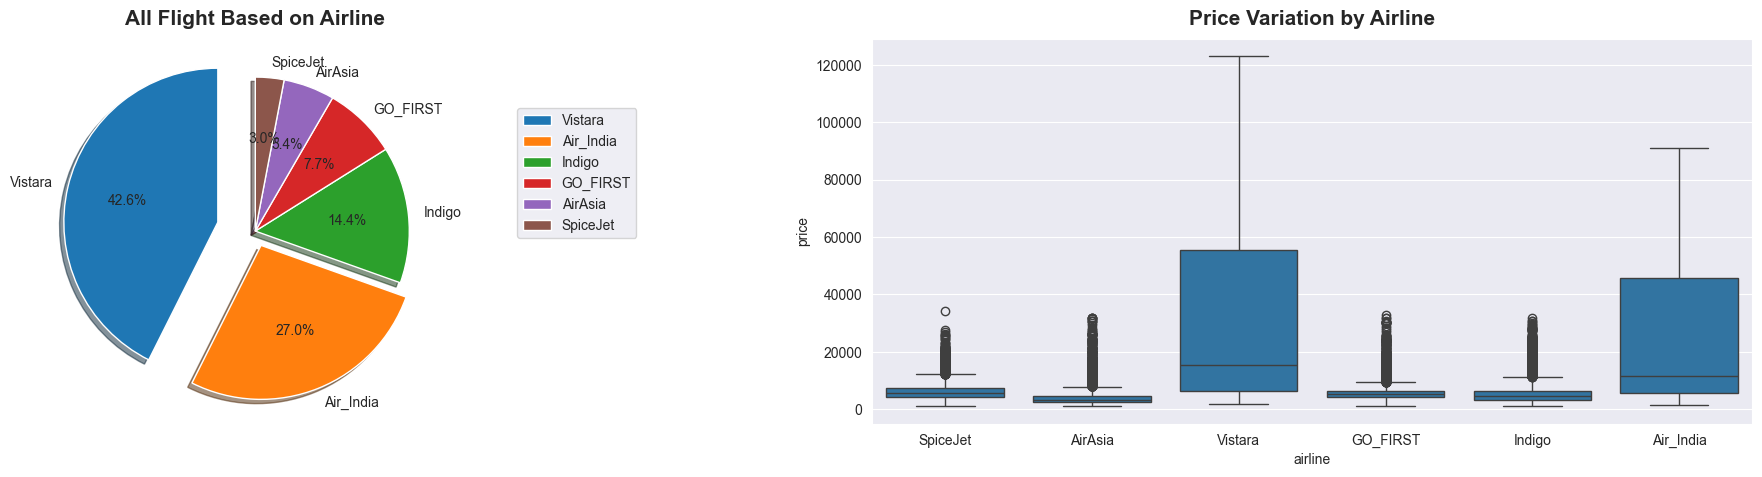

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(25, 5))

# PIE CHART
axs[0].set_title('All Flight Based on Airline', fontsize=15, weight='bold', pad=10)
axs[0].pie(flight_airline, labels=flight_airline.index, autopct='%1.1f%%', shadow=True, explode=(0.25, 0.1, 0, 0, 0, 0), startangle=90)

axs[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

axs[1].set_title('Price Variation by Airline', fontsize=15, weight='bold', pad=10)
sns.boxplot(x='airline', y='price', data=df, ax=axs[1])

plt.show()

Observation Results:
1. Most used airline is Vistara with 42.6% of all flight
2. The second place with total flight is Air-India with 27% of all flight
3. Both Vistara and Air India also has wider price range than other airlines.

### **2. Source_city + Destination_city & Price**

In [14]:
flight_source = df['source_city'].value_counts()
flight_destination = df['destination_city'].value_counts()
print(flight_source)
print('-' * 50)
print(flight_destination)

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64
--------------------------------------------------
destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64


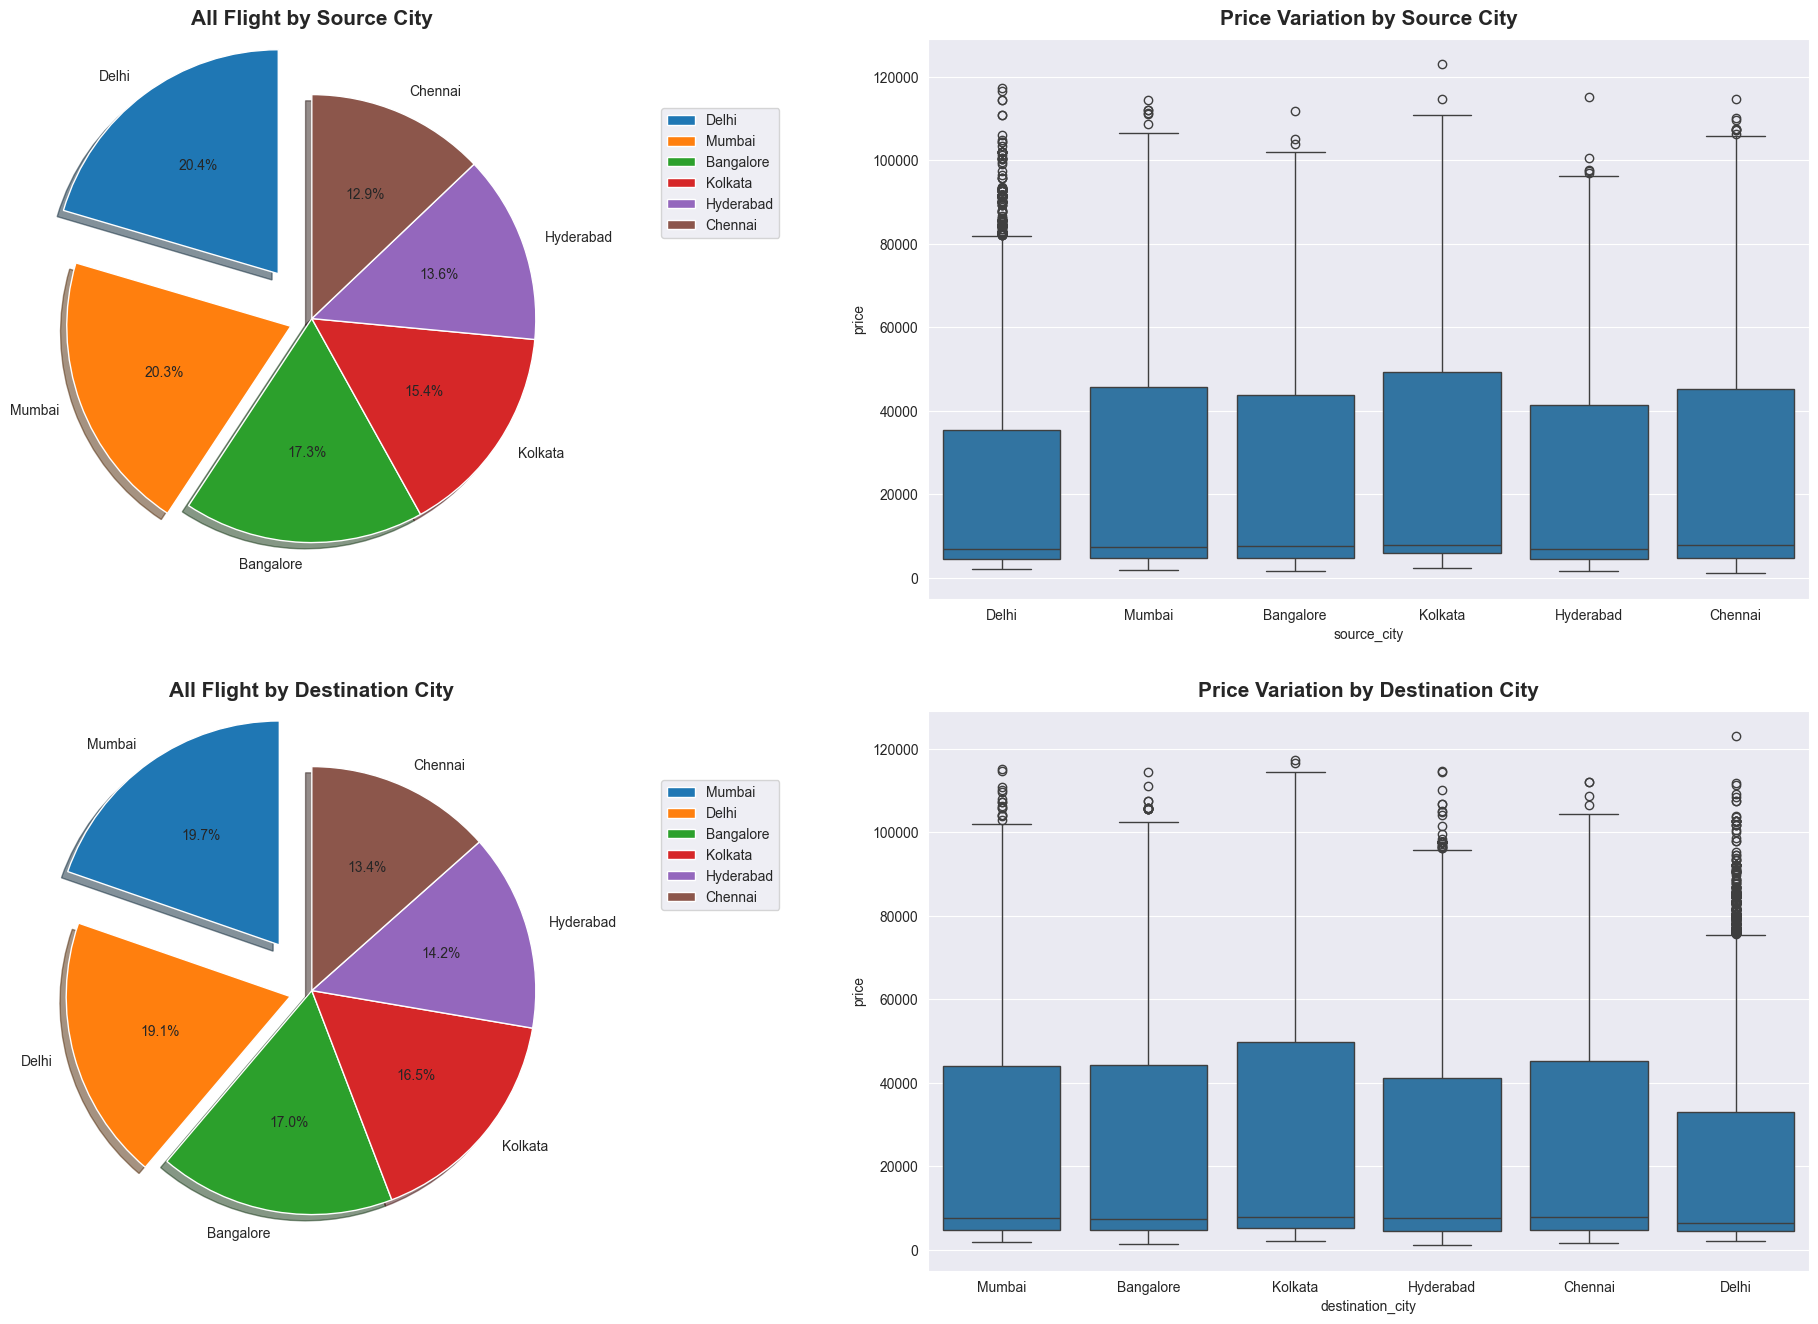

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(25, 16))

axs[0, 0].set_title('All Flight by Source City', fontsize=15, weight='bold', pad=10)

axs[0, 0].pie(flight_source, labels=flight_source.index, autopct='%1.1f%%', shadow=True, explode=(0.25, 0.1, 0, 0, 0, 0), startangle=90)
axs[0, 0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

axs[0, 1].set_title('Price Variation by Source City', fontsize=15, weight='bold', pad=10)
sns.boxplot(x='source_city', y='price', data=df, ax=axs[0, 1])

axs[1, 0].set_title('All Flight by Destination City', fontsize=15, weight='bold', pad=10)
axs[1, 0].pie(flight_destination, labels=flight_destination.index, autopct='%1.1f%%', shadow=True, explode=(0.25, 0.1, 0, 0, 0, 0), startangle=90)
axs[1, 0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

axs[1, 1].set_title('Price Variation by Destination City', fontsize=15, weight='bold', pad=10)
sns.boxplot(x='destination_city', y='price', data=df, ax=axs[1, 1])

plt.show()

Observation Results:
1. Most used flight originate from Delhi with 20.4% and Mumbai 20.3% (slightly different)
2. And most destination flight from Mumbai with 19.7% and Delhi with 19.1%. So, my assumption so far there are plenty of flight from Delhi to Mumbai and vice versa (round trip flight). And it's all make sense since both of cities are big city one is the capital city and the other is economic center city.
3. Most of flight from and to other city has similar price range but Delhi has some outliers.

### **3. Departure_time + Arrival_time & Price**

In [16]:
flight_departure_time = df['departure_time'].value_counts()
flight_arrival_time = df['arrival_time'].value_counts()
print(flight_departure_time)
print('-' * 50)
print(flight_arrival_time)

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64
--------------------------------------------------
arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64


<Axes: title={'center': 'Price Variation by Arrival Time'}, xlabel='arrival_time', ylabel='price'>

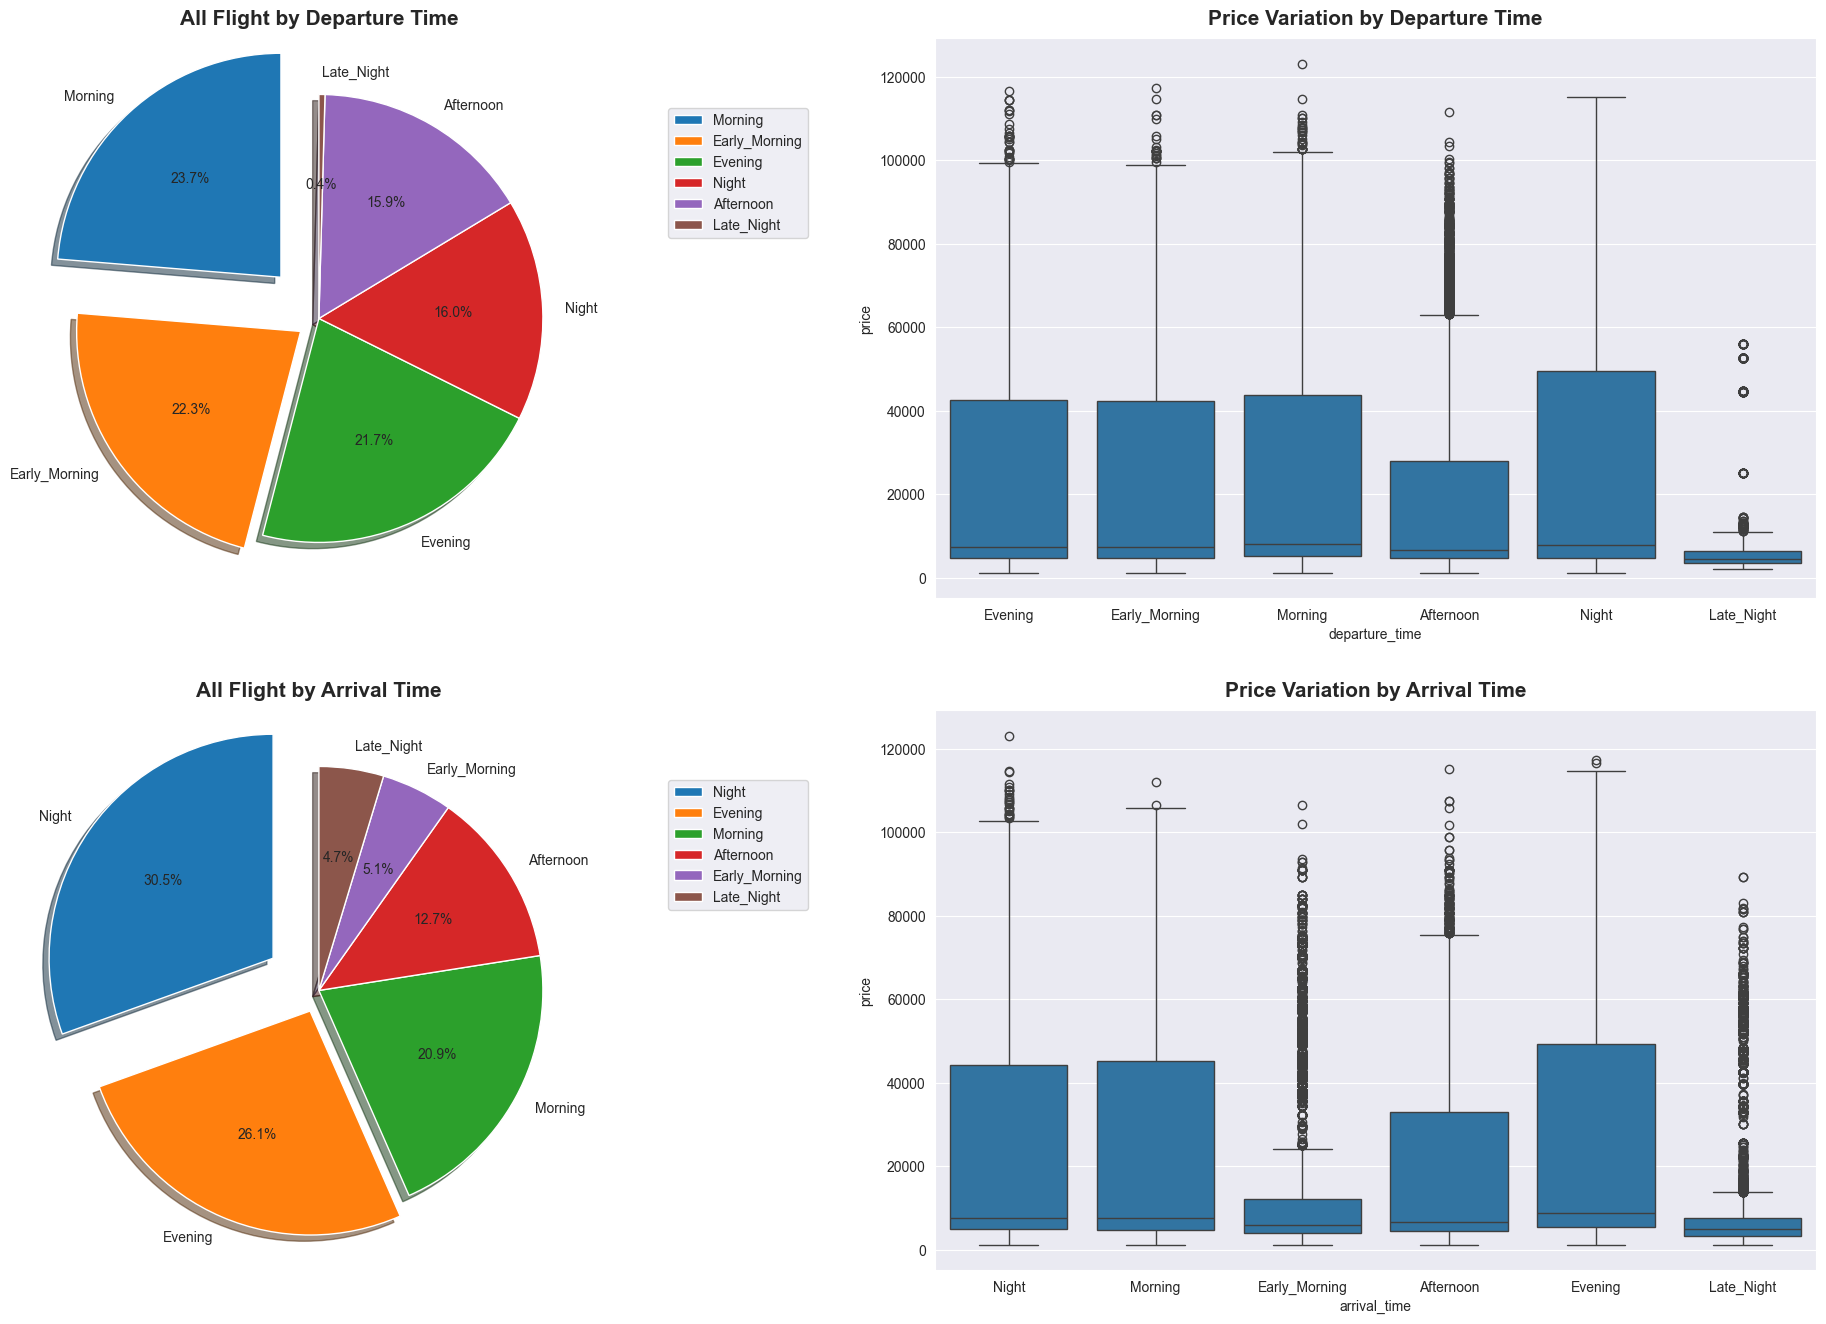

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(25, 16))

# PIE Chart 1
axs[0, 0].set_title('All Flight by Departure Time', fontsize=15, weight='bold', pad=10)
axs[0, 0].pie(flight_departure_time, labels=flight_departure_time.index, autopct='%1.1f%%', shadow=True, explode=(0.25, 0.1, 0, 0 ,0, 0), startangle=90)
axs[0, 0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# BOXPLOT 1
axs[0, 1].set_title('Price Variation by Departure Time', fontsize=15, weight='bold', pad=10)
sns.boxplot(x='departure_time', y='price', data=df, ax=axs[0, 1])

# PIE CHART 2
axs[1, 0].set_title('All Flight by Arrival Time', fontsize=15, weight='bold', pad=10)
axs[1, 0].pie(flight_arrival_time, labels=flight_arrival_time.index, autopct='%1.1f%%', shadow=True, explode=(0.25, 0.1, 0, 0, 0, 0), startangle=90)
axs[1, 0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# BOXPLOT 2
axs[1, 1].set_title('Price Variation by Arrival Time', fontsize=15, weight='bold', pad=10)
sns.boxplot(x='arrival_time', y='price', data=df, ax=axs[1, 1])

Observation Results:

**Time**
1. Departures are most frequent in the Morning, Early Morning, and Evening each making up over 20%.
2. Arrivals are dominated by Night and Evening, suggesting travelers prefer reaching their destinations when they can rest.
3. Late Night arrivals are rare due to limited transportation and convenience.
4. 90.2% of flights arrive during typical hours (Day or Night), while only 9.8% arrive in less preferred times (Late Night or Early Morning).
**Price**

1. Just like how the flight data based on departure and arrival time distribute, the price also has similar or align result.
2. Price based on departure time only has one outlier which is late night where the price range is smallest than others.
3. And price based on arrival time also similar like how the pie data distrubuted where the price with flight arrive in the early morning or late night has price range that smaller than others.

### **4. Stops & Price**

In [18]:
flight_stops = df['stops'].value_counts()
flight_stops

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

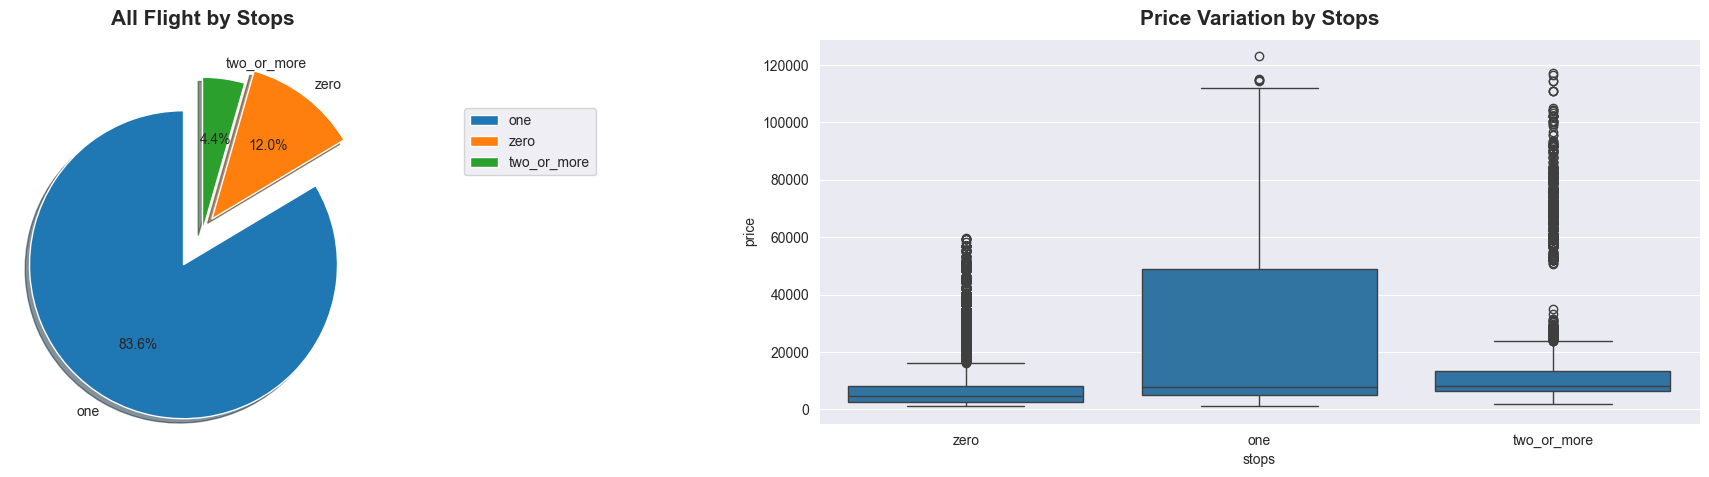

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(25, 5))

# PIE CHART
axs[0].set_title('All Flight by Stops', fontsize=15, weight='bold', pad=10)
axs[0].pie(flight_stops, labels=flight_stops.index, autopct='%1.1f%%', shadow=True, explode=(0.25, 0.1, 0), startangle=90)

#bbox (bounding box) (left-right, bottom-top : 0 or 1)
axs[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

axs[1].set_title('Price Variation by Stops', fontsize=15, weight='bold', pad=10)
sns.boxplot(x='stops', y='price', data=df, ax=axs[1])
plt.show()

Observation Results:
**Stops:**
1. One-stop flights dominate with 83.6% of all flights.
2. Non-stop (zero) flights make up 12.0%.
3. Two or more stops are the least common at 4.4%.

**Price:**

1. One-stop flights have the widest price range, including high-price outliers.
2. Zero-stop flights have a lower median price and less variation.
3. Two or more stops have a slightly higher median price than zero-stop flights, but prices are generally more concentrated and slightly skewed upward.

### **5. Class + Duration & Price**

In [20]:
flight_class = df['class'].value_counts()
flight_class

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [21]:
df['duration'].value_counts()


duration
2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
41.08       1
35.67       1
47.08       1
44.50       1
41.50       1
Name: count, Length: 476, dtype: int64

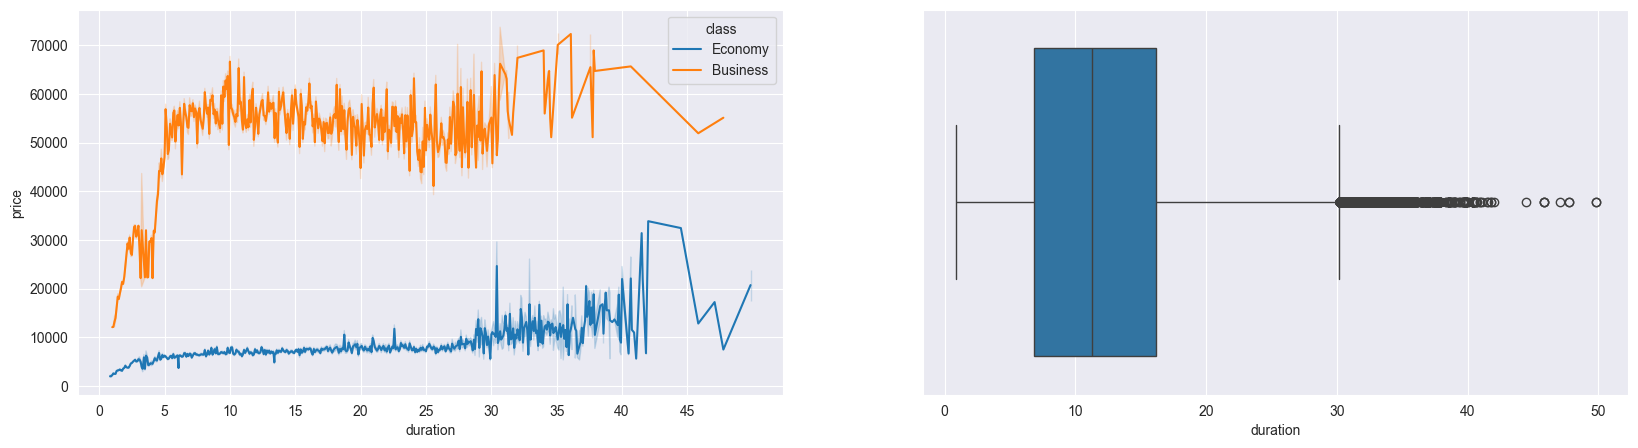

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

sns.lineplot(x='duration', y='price', data=df, ax=axs[0], hue='class')
axs[0].set_xticks(np.arange(0, 50, 5))

sns.boxplot(data=df, x='duration', ax=axs[1])

plt.show()


Observation Results:
1. For business class, the price getting higher from flight duration 1 hour to 5 hours.
2. Unlike business clas, the economy class's price getting higher gradually align with flight duration. The price become more than 20K after reach flight duration around 40 hours.
3. In general flight duration 7-16 hours.

### **6. Days left & Price**

In [23]:
df['days_left'].value_counts()

days_left
25    6633
18    6602
39    6593
32    6585
26    6573
24    6542
19    6537
31    6534
33    6532
40    6531
41    6525
28    6522
38    6512
20    6502
30    6501
42    6497
22    6494
36    6490
21    6479
37    6476
43    6472
44    6436
17    6419
11    6417
34    6412
13    6404
23    6401
29    6397
12    6381
27    6360
14    6349
15    6340
45    6314
35    6291
16    6272
46    6160
49    6154
48    6078
47    6069
10    5822
8     5767
6     5740
7     5703
9     5665
5     5392
4     5077
3     4248
2     4026
1     1927
Name: count, dtype: int64

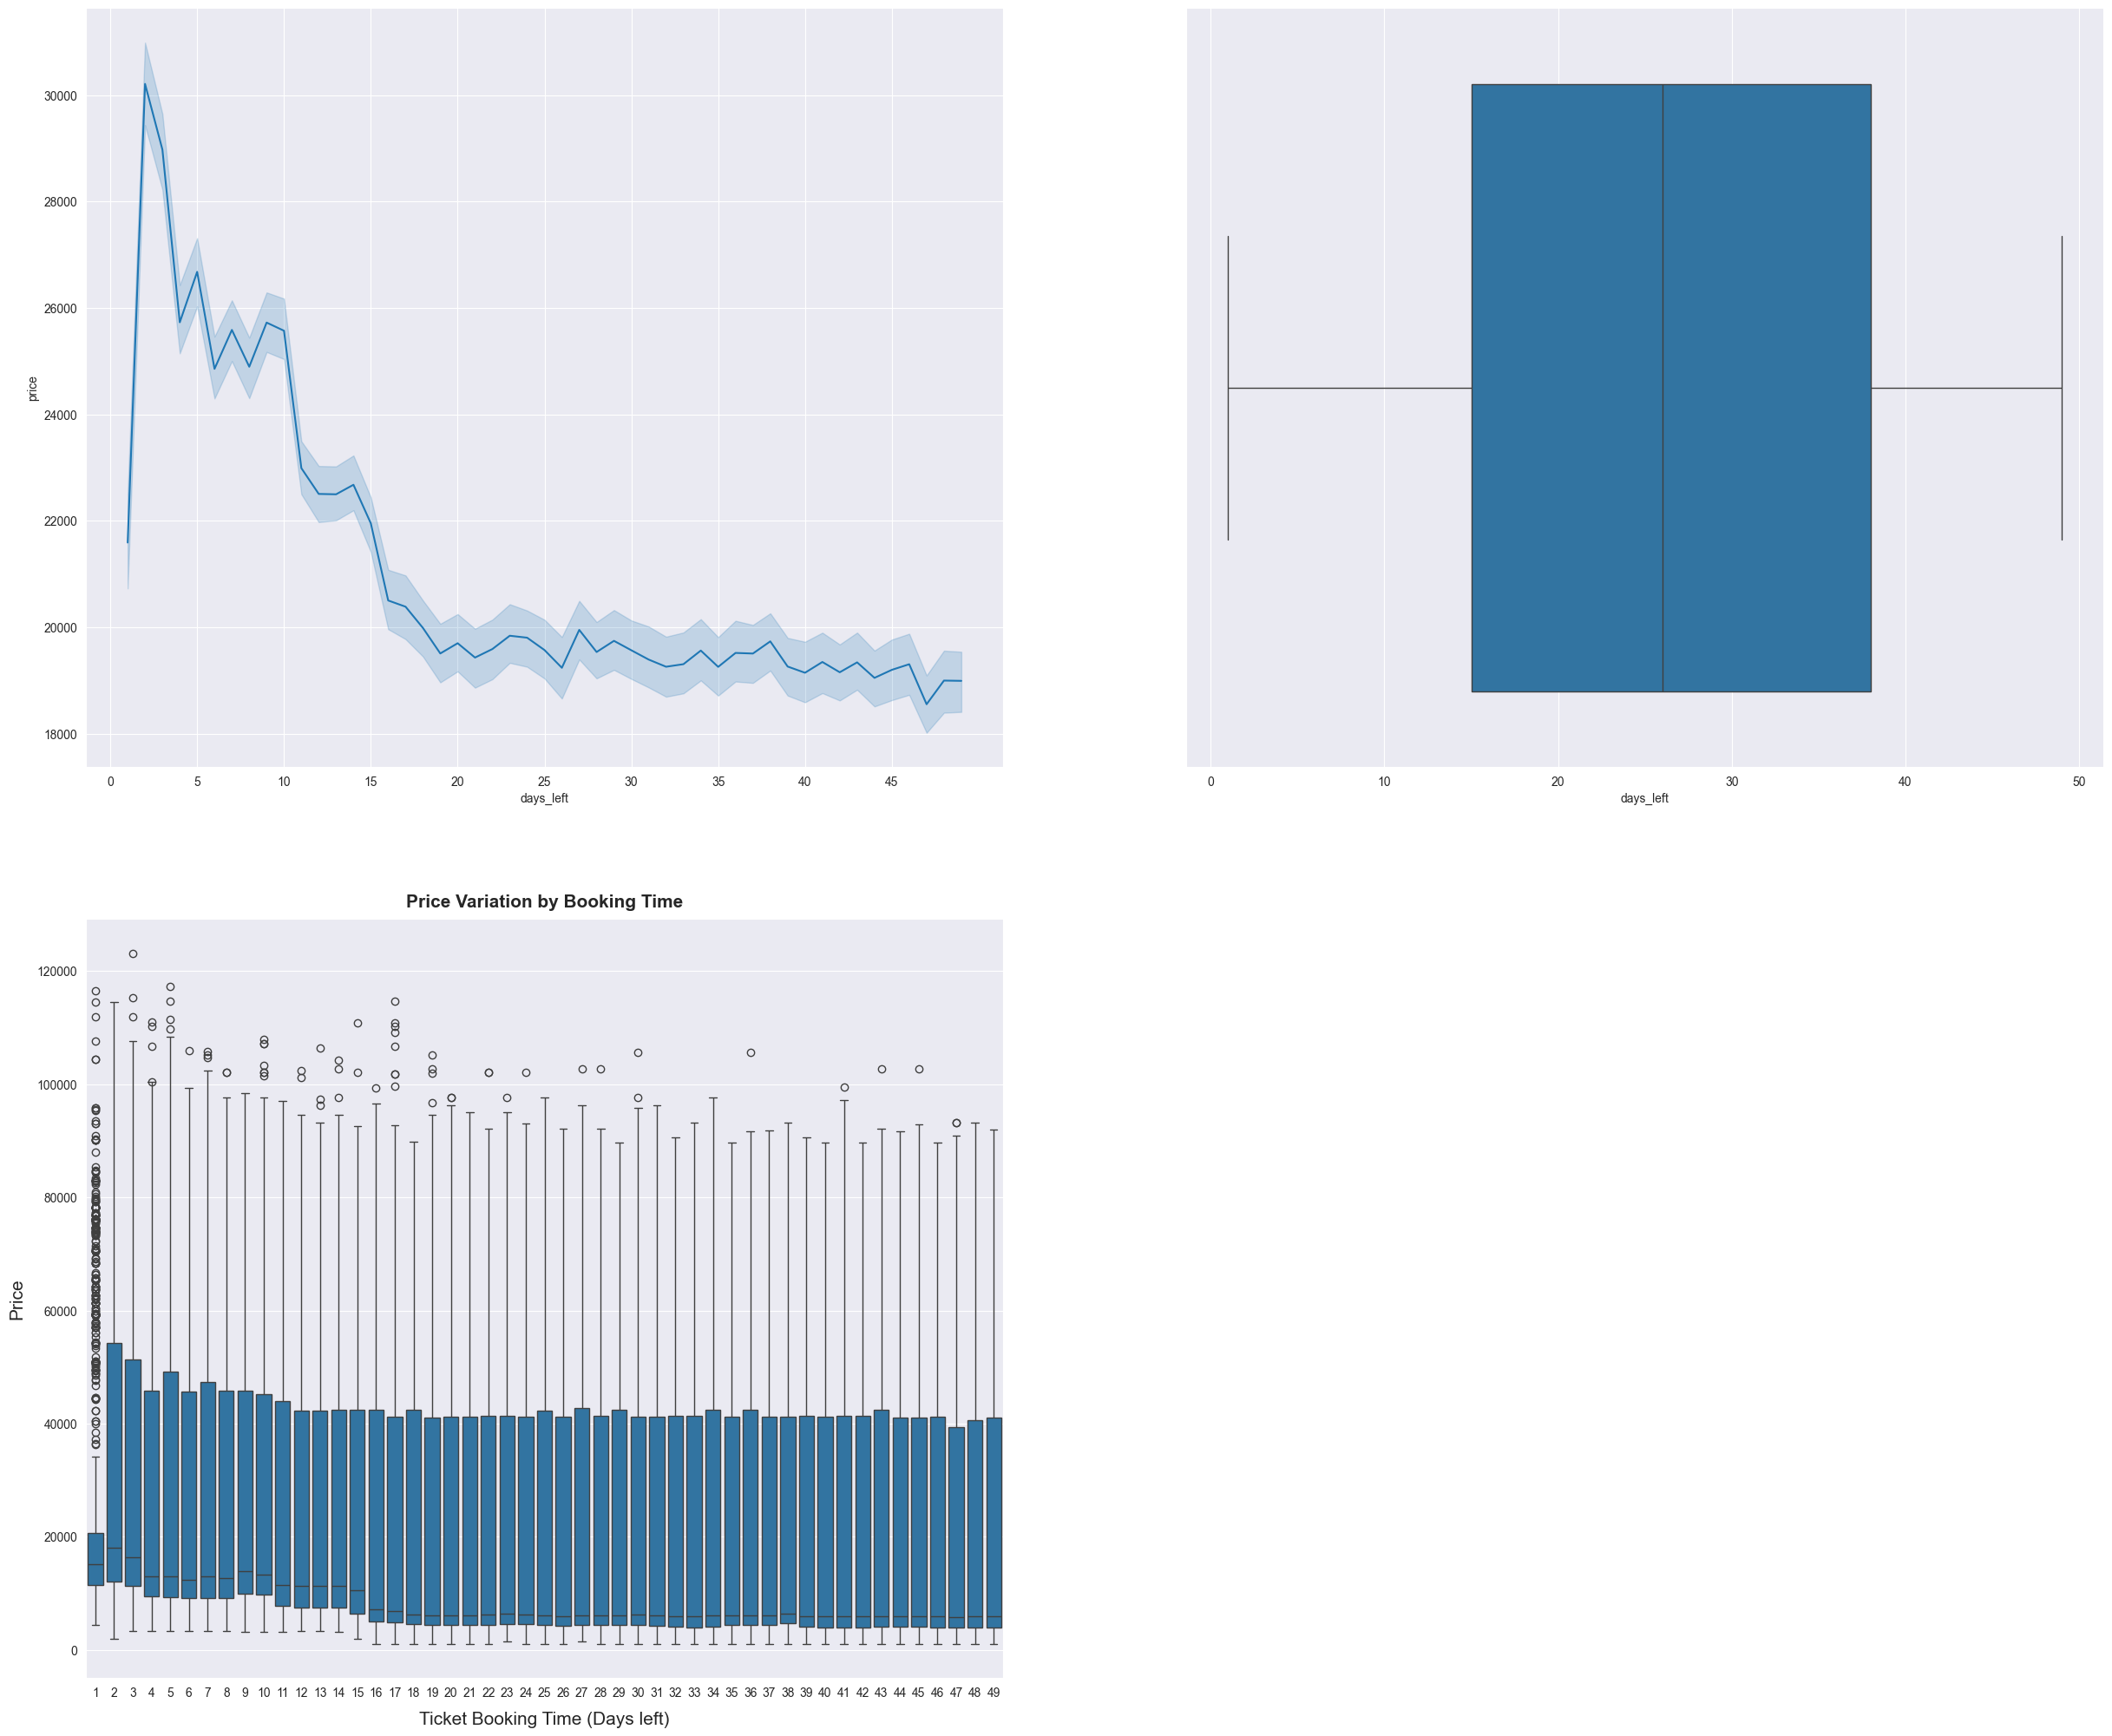

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(30, 25))

sns.lineplot(x='days_left', y='price', data=df, ax=axs[0, 0]).set_xticks(np.arange(0, 50, 5))
sns.boxplot(x=df['days_left'], ax=axs[0, 1])

df_booked = df.copy()
df_booked['book_category'] = df_booked['days_left'].apply(lambda x: f"{x}")

# Box plot to show price variation based on last-minute purchases
axs[1, 0].set_title('Price Variation by Booking Time', fontsize=15, weight='bold', pad=10)
sns.boxplot(x='book_category', y='price', data=df_booked, ax=axs[1, 0])

axs[1, 0].set_xlabel('Ticket Booking Time (Days left)', fontsize=15, labelpad=10)
axs[1, 0].set_ylabel('Price', fontsize=15, labelpad=10)

# day_left_filtered = df[df['days_left'] <= 5]

# sns.lineplot(x='days_left', y='price', data=day_left_filtered, ax=axs[1, 1]).set_xticks(np.arange(0, 7, 1))

axs[1, 1].axis('off')

plt.show()

Observation Results:
1. Highest prices occur for bookings made 1–3 days before departure, with a sharp peak at D-2.
2. Significant price drop after D-2, especially on D-1, possibly due to last-minute ticket discounting to fill remaining seats.
3. From around D-20 onward, the price variation stabilizes, showing less fluctuation and generally lower median fares.

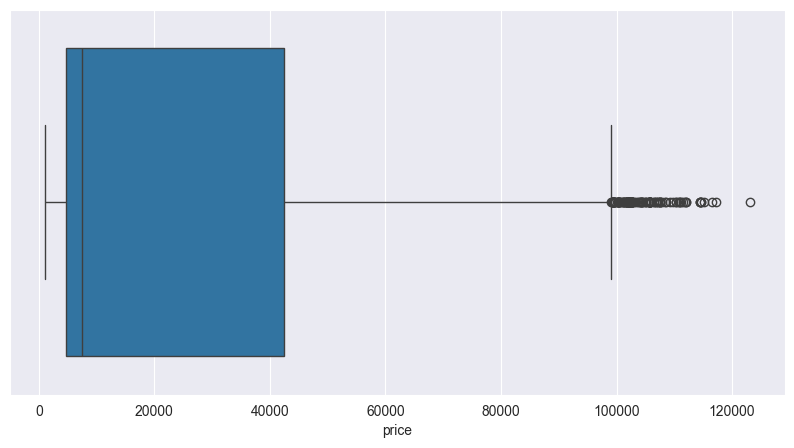

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='price', data=df)
plt.show()

# **IV. Data Transformation**

### **Categorical Data**

<Axes: >

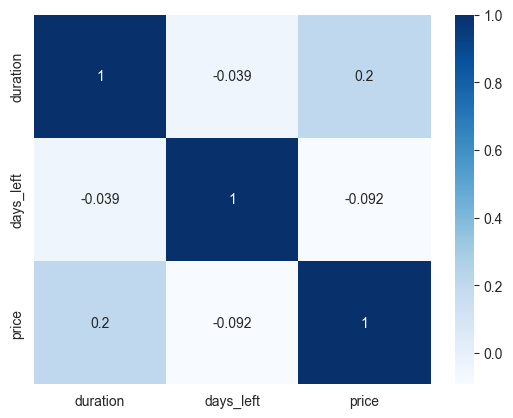

In [26]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='Blues')


In [27]:
df.describe(include = 'all')

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [28]:
import pandas as pd
import numpy as np

# Columns need to be encoded
cat_cols = [
    'airline', 'source_city', 'departure_time', 'stops',
    'arrival_time', 'destination_city', 'class'
]

# One-hot encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# scale fitting for days_left
conditions = [
    df['days_left'].between(1, 5),
    df['days_left'].between(6, 10),
    df['days_left'].between(11, 15),
    df['days_left'] > 15
]
choices = [df['days_left'], 6, 11, 15]

df['days_left'] = np.select(conditions, choices)

In [29]:
df

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,2.17,1,5953,False,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,True
1,2.33,1,5953,False,False,False,True,False,False,True,...,False,False,True,False,False,False,False,False,True,True
2,2.17,1,5956,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,True
3,2.25,1,5955,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,True,True
4,2.33,1,5955,False,False,False,False,True,False,True,...,False,False,True,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,10.08,15,69265,False,False,False,False,True,True,False,...,True,False,False,False,False,False,True,False,False,False
300149,10.42,15,77105,False,False,False,False,True,True,False,...,False,False,False,True,False,False,True,False,False,False
300150,13.83,15,79099,False,False,False,False,True,True,False,...,False,False,False,True,False,False,True,False,False,False
300151,10.00,15,81585,False,False,False,False,True,True,False,...,True,False,False,False,False,False,True,False,False,False


# **V. Training**

In [30]:
#Import library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn import metrics

In [31]:
clean_df = df.copy()

# Define features and target
X = clean_df.drop(columns=['price'])
y = clean_df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import numpy as np

# Define model
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# KFold Cross-validation on train value
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    mae_list, rmse_list, r2_list = [], [], []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train), 1):
        X_fold_train = X_train.iloc[train_idx]
        X_fold_val = X_train.iloc[val_idx]
        y_fold_train = y_train.iloc[train_idx]
        y_fold_val = y_train.iloc[val_idx]

        model.fit(X_fold_train, y_fold_train)
        y_pred = model.predict(X_fold_val)

        mae = mean_absolute_error(y_fold_val, y_pred)
        rmse = np.sqrt(mean_squared_error(y_fold_val, y_pred))
        r2 = r2_score(y_fold_val, y_pred)

        mae_list.append(mae)
        rmse_list.append(rmse)
        r2_list.append(r2)

        print(f"[{name} - Fold {fold}] MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.5f}")

    print(f"\n=== {name} (5-Fold CV on Training Set) ===")
    print(f"Average MAE:  {np.mean(mae_list):.2f}")
    print(f"Average RMSE: {np.mean(rmse_list):.2f}")
    print(f"Average R2:   {np.mean(r2_list):.5f}\n")
    print("="*60)


[Linear Regression - Fold 1] MAE: 4439.49, RMSE: 6634.05, R2: 0.91450
[Linear Regression - Fold 2] MAE: 4438.88, RMSE: 6626.10, R2: 0.91526
[Linear Regression - Fold 3] MAE: 4453.18, RMSE: 6666.25, R2: 0.91401
[Linear Regression - Fold 4] MAE: 4476.39, RMSE: 6688.25, R2: 0.91295
[Linear Regression - Fold 5] MAE: 4443.03, RMSE: 6642.29, R2: 0.91383

=== Linear Regression (5-Fold CV on Training Set) ===
Average MAE:  4450.20
Average RMSE: 6651.39
Average R2:   0.91411

[Decision Tree - Fold 1] MAE: 1221.41, RMSE: 3061.24, R2: 0.98179
[Decision Tree - Fold 2] MAE: 1220.92, RMSE: 3072.64, R2: 0.98178
[Decision Tree - Fold 3] MAE: 1219.02, RMSE: 3090.99, R2: 0.98151
[Decision Tree - Fold 4] MAE: 1217.45, RMSE: 3069.91, R2: 0.98166
[Decision Tree - Fold 5] MAE: 1221.52, RMSE: 3061.27, R2: 0.98170

=== Decision Tree (5-Fold CV on Training Set) ===
Average MAE:  1220.07
Average RMSE: 3071.21
Average R2:   0.98169

[Random Forest - Fold 1] MAE: 1185.94, RMSE: 2763.12, R2: 0.98517
[Random Forest

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Hàm tính RMSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Khởi tạo mô hình
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42)
}

# Huấn luyện và đánh giá từng mô hình
for name, model in models.items():
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_test_pred)
    rmse = root_mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)

    print(f"{name}:")
    print(f"  Test  - MAE: {mae:.2f}  RMSE: {rmse:.2f}  R2: {r2:.5f}")
    print("-" * 60)


Linear Regression:
  Test  - MAE: 4430.60  RMSE: 6664.78  R2: 0.91383
------------------------------------------------------------
Decision Tree Regressor:
  Test  - MAE: 1191.22  RMSE: 3028.99  R2: 0.98220
------------------------------------------------------------
Random Forest Regressor:
  Test  - MAE: 1154.87  RMSE: 2750.50  R2: 0.98532
------------------------------------------------------------


# **VI. Prediction**

In [41]:
# Use model Random Forest
final_model = RandomForestRegressor(random_state=42)
final_model.fit(X_train, y_train)
y_predict = final_model.predict(X_test)

final_result = pd.DataFrame({'actual_price': y_test, 'pred_price': y_predict})


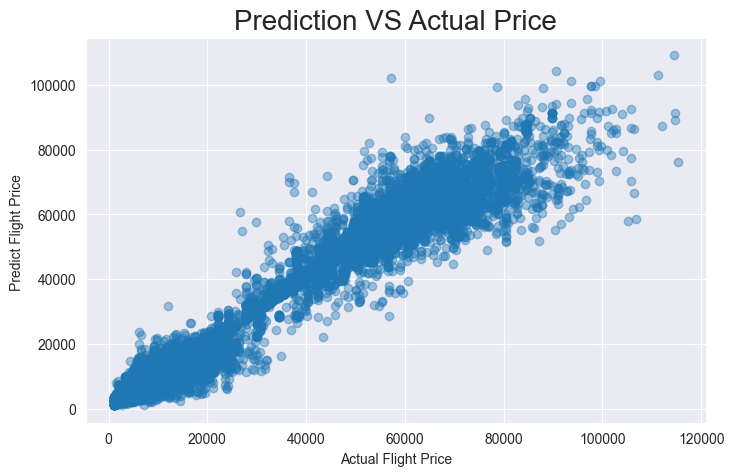

In [42]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_predict, alpha=0.40)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predict Flight Price ')
plt.title("Prediction VS Actual Price",fontsize=20)
plt.show()

In [43]:
def preprocess_new_data(new_data_raw, df_train, cat_cols):
    import numpy as np
    import pandas as pd

    # Scale days_left
    conditions = [
        new_data_raw['days_left'].between(1, 5),
        new_data_raw['days_left'].between(6, 10),
        new_data_raw['days_left'].between(11, 15),
        new_data_raw['days_left'] > 15
    ]
    choices = [new_data_raw['days_left'], 6, 11, 15]
    new_data_raw['days_left'] = np.select(conditions, choices, default=0)

    # ===== One-hot encoding =====
    new_data_encoded = pd.get_dummies(new_data_raw, columns=cat_cols, drop_first=True)

    # ===== Ensure same column as train =====
    model_cols = df_train.drop(columns=['price']).columns  # Remove target column

    for col in model_cols:
        if col not in new_data_encoded.columns:
            new_data_encoded[col] = 0  # thêm cột thiếu

    # ===== Đảm bảo đúng thứ tự cột =====
    new_data_encoded = new_data_encoded[model_cols]

    return new_data_encoded

# Columns need to encoded
cat_cols = [
    'airline', 'source_city', 'departure_time', 'stops',
    'arrival_time', 'destination_city', 'class'
]

# new data
new_data = pd.DataFrame({
    'airline': ['Vistara'],
    'source_city': ['Mumbai'],
    'departure_time': ['Morning'],
    'stops': ['one stop'],
    'arrival_time': ['Night'],
    'destination_city': ['Mumbai'],
    'class': ['Business'],
    'duration': [10],
    'days_left': [30]
})

# Preprocessing for predict
new_data_preprocessed = preprocess_new_data(new_data, df, cat_cols)

# Predict
predicted_price = final_model.predict(new_data_preprocessed)
print("Predicted Price:", predicted_price[0])


Predicted Price: 56420.60488476065


In [37]:
import joblib

# Save model
joblib.dump(final_model, 'Final_Model.pkl')


['Final_Model.pkl']